In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import matplotlib.colors as colors
import cmocean.cm as cmo
from glob import glob
from xorca.lib import load_xorca_dataset
import xgcm

In [2]:
u_data_filesREF = glob("/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-REF08-S/5d/200?/CREG12.L75-REF08_*.5d_*gridU.nc")
v_data_filesREF = glob("/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-REF08-S/5d/200?/CREG12.L75-REF08_*.5d_*gridV.nc")
u_data_filesFUT = glob("/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-FUT08-S/5d/206?/CREG12.L75-FUT08_*.5d_*gridU.nc")
v_data_filesFUT = glob("/data0/project/drakkar/CONFIGS/CREG12.L75/CREG12.L75-FUT08-S/5d/206?/CREG12.L75-FUT08_*.5d_*gridV.nc")
grid_files = ["/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mask.nc", 
              "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mesh_hgr.nc",
              "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mesh_zgr.nc"]
coords_file = "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/coordinates_CREG12_lbclnk_noz_vh20160930.nc"
bathy_file = "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/bathymetry_CREG12_V3.3_CT20180612Larger_ct20190102.nc"

In [3]:
def preproU(ds):
    ds.drop(("time_centered", "time_centered_bounds", "sozotaux", "utau_atmoce", "utau_iceoce", "uwspd10"))
    return ds.isel(y=slice(800, None))

def preproV(ds):
    ds.drop(("time_centered", "time_centered_bounds", "sometauy", "vtau_atmoce", "vtau_iceoce", "vwspd10"))
    return ds.isel(y=slice(800, None))

def preproGRID(ds):
    return ds.isel(y=slice(800, None))

In [4]:
grid = xr.open_mfdataset(grid_files, parallel=True, preprocess=preproGRID)
coords = xr.open_mfdataset(coords_file, parallel=True, preprocess=preproGRID)
bathy = xr.open_mfdataset(bathy_file, parallel=True, preprocess=preproGRID)

In [5]:
uREF = xr.open_mfdataset(u_data_filesREF, coords="minimal", compat="override", parallel=True, 
                         preprocess=preproU, chunks={"depthu": 1, "y": 600, "x": 800})
vREF = xr.open_mfdataset(v_data_filesREF, coords="minimal", compat="override", parallel=True, 
                         preprocess=preproV, chunks={"depthv": 1, "y": 600, "x": 800})

In [6]:
uFUT = xr.open_mfdataset(u_data_filesFUT, coords="minimal", compat="override", parallel=True, 
                         preprocess=preproU, chunks={"depthu": 1, "y": 600, "x": 800})
vFUT = xr.open_mfdataset(v_data_filesFUT, coords="minimal", compat="override", parallel=True, 
                         preprocess=preproV, chunks={"depthv": 1, "y": 600, "x": 800})

In [7]:
KEREF = 0.5 * (uREF.vozocrtx.rename({"depthu": "depth"})**2 + vREF.vomecrty.rename({"depthv": "depth"})**2)

In [8]:
KEFUT = 0.5 * (uFUT.vozocrtx.rename({"depthu": "depth"})**2 + vFUT.vomecrty.rename({"depthv": "depth"})**2)

In [13]:
KEREFplot = KEREF.where(KEREF > 0).isel(depth=0).mean("time_counter").compute()
KEFUTplot = KEFUT.where(KEFUT > 0).isel(depth=0).mean("time_counter").compute()

In [73]:
moor1x = 540
moor1y = 730
moor2x = 820
moor2y = 450
moor3x = 960
moor3y = 350
moor4x = 650
moor4y = 420
moor5x = 1040
moor5y = 520
moor6x = 840
moor6y = 740
moor7x = 870
moor7y = 860
moor8x = 1200
moor8y = 200
moor9x = 660
moor9y = 750
moorWALx = 540
moorWALy = 820
moorWLSx = 1080
moorWLSy = 660
moorWSZx = 1070
moorWSZy = 600

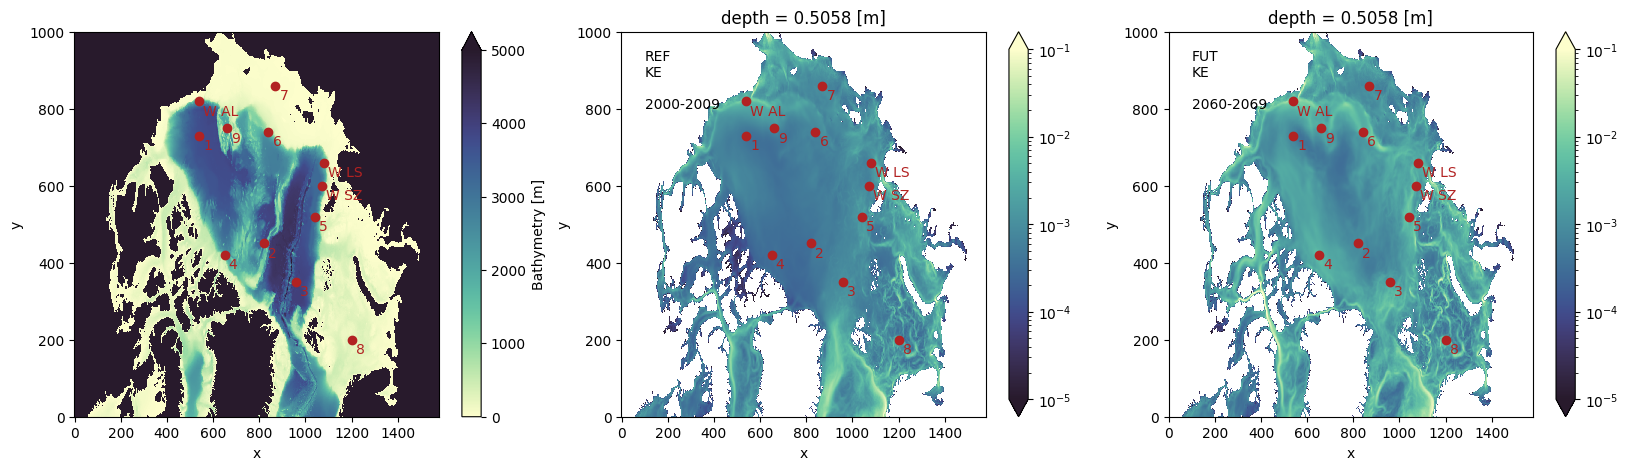

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

(bathy.Bathymetry.where(bathy.Bathymetry!=0, other=6000)).plot(ax=ax[0], cmap=cmo.deep, vmin=0, vmax=5000)

KEREFplot.plot(vmin=1e-5, vmax=1e-1, cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
KEFUTplot.plot(vmin=1e-5, vmax=1e-1, cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[2])
ax[1].text(100, 800, "REF\nKE\n\n2000-2009")
ax[2].text(100, 800, "FUT\nKE\n\n2060-2069")

for a in ax:
    a.plot(moor1x, moor1y, marker="o", color="firebrick")
    a.annotate("1", (moor1x, moor1y), textcoords="offset points", xytext=(3, -10), ha='left', color="firebrick")
    a.plot(moor2x, moor2y, marker="o", color="firebrick")
    a.annotate("2", (moor2x, moor2y), textcoords="offset points", xytext=(3, -10), ha='left', color="firebrick")
    a.plot(moor3x, moor3y, marker="o", color="firebrick")
    a.annotate("3", (moor3x, moor3y), textcoords="offset points", xytext=(3, -10), ha='left', color="firebrick")
    a.plot(moor4x, moor4y, marker="o", color="firebrick")
    a.annotate("4", (moor4x, moor4y), textcoords="offset points", xytext=(3, -10), ha='left', color="firebrick")
    a.plot(moor5x, moor5y, marker="o", color="firebrick")
    a.annotate("5", (moor5x, moor5y), textcoords="offset points", xytext=(3, -10), ha='left', color="firebrick")
    a.plot(moor6x, moor6y, marker="o", color="firebrick")
    a.annotate("6", (moor6x, moor6y), textcoords="offset points", xytext=(3, -10), ha='left', color="firebrick")
    a.plot(moor7x, moor7y, marker="o", color="firebrick")
    a.annotate("7", (moor7x, moor7y), textcoords="offset points", xytext=(3, -10), ha='left', color="firebrick")
    a.plot(moor8x, moor8y, marker="o", color="firebrick")
    a.annotate("8", (moor8x, moor8y), textcoords="offset points", xytext=(3, -10), ha='left', color="firebrick")
    a.plot(moor9x, moor9y, marker="o", color="firebrick")
    a.annotate("9", (moor9x, moor9y), textcoords="offset points", xytext=(3, -10), ha='left', color="firebrick")
    a.plot(moorWALx, moorWALy, marker="o", color="firebrick")
    a.annotate("W AL", (moorWALx, moorWALy), textcoords="offset points", xytext=(3, -10), ha='left', color="firebrick")
    a.plot(moorWLSx, moorWLSy, marker="o", color="firebrick")
    a.annotate("W LS", (moorWLSx, moorWLSy), textcoords="offset points", xytext=(3, -10), ha='left', color="firebrick")
    a.plot(moorWSZx, moorWSZy, marker="o", color="firebrick")
    a.annotate("W SZ", (moorWSZx, moorWSZy), textcoords="offset points", xytext=(3, -10), ha='left', color="firebrick")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k00_moorings_bathy.v2.png", dpi=300)

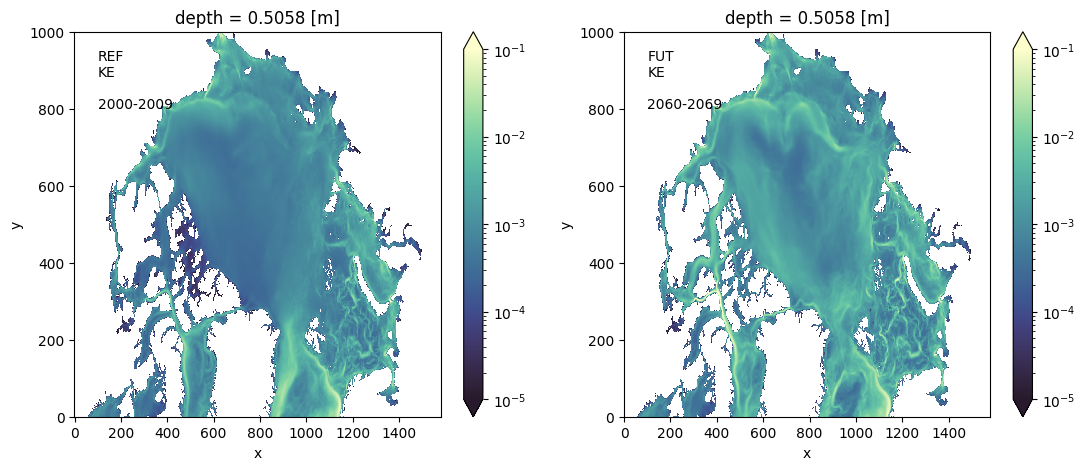

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=0).mean("time_counter").plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=0).mean("time_counter").plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\n2060-2069")

#plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k00_moorings.png", dpi=300)

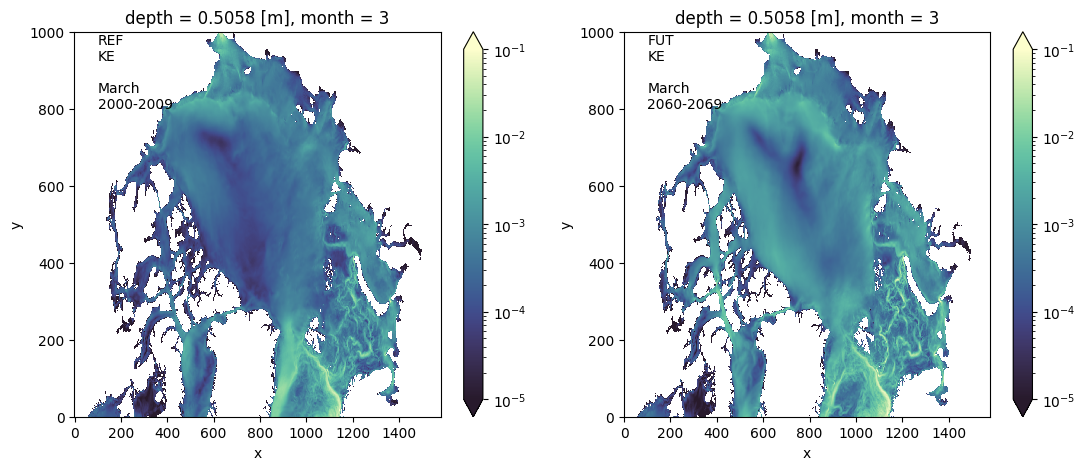

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=0).groupby("time_counter.month").mean("time_counter").sel(month=3).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=0).groupby("time_counter.month").mean("time_counter").sel(month=3).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\nMarch\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\nMarch\n2060-2069")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k00_march.png", dpi=300)

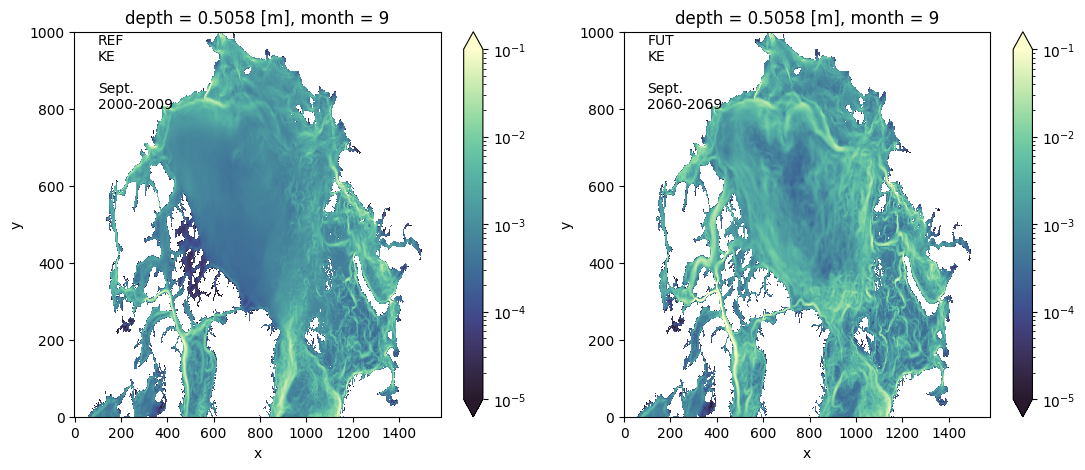

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=0).groupby("time_counter.month").mean("time_counter").sel(month=9).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=0).groupby("time_counter.month").mean("time_counter").sel(month=9).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\nSept.\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\nSept.\n2060-2069")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k00_september.png", dpi=300)

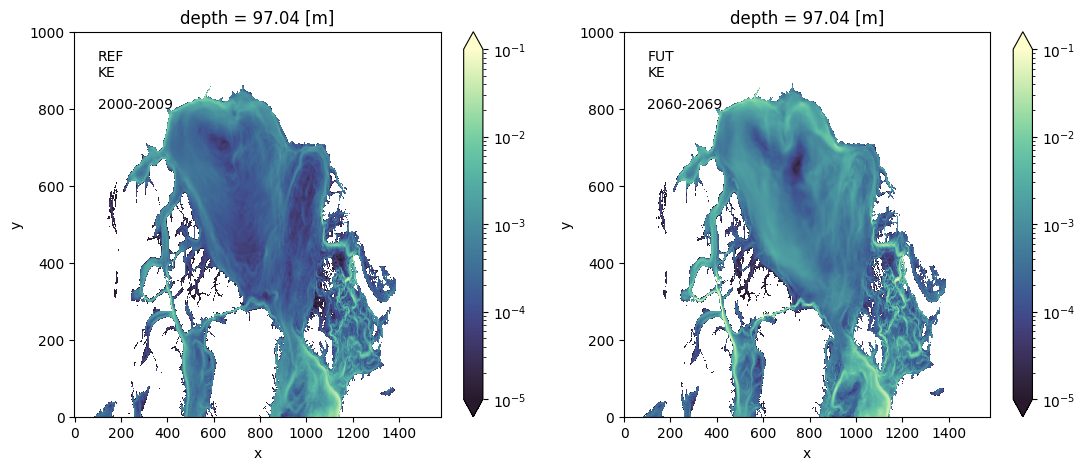

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=23).mean("time_counter").plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=23).mean("time_counter").plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\n2060-2069")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k23.png", dpi=300)

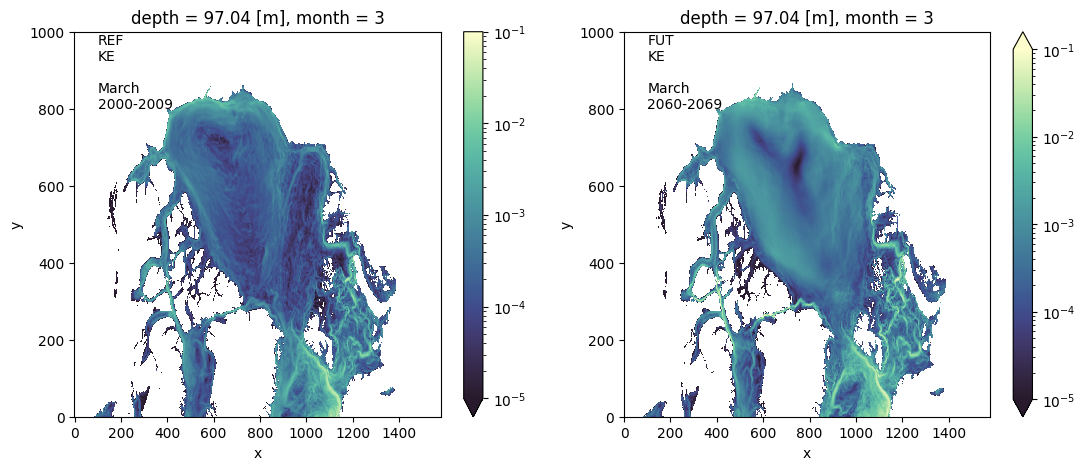

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=23).groupby("time_counter.month").mean("time_counter").sel(month=3).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=23).groupby("time_counter.month").mean("time_counter").sel(month=3).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\nMarch\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\nMarch\n2060-2069")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k23_march.png", dpi=300)

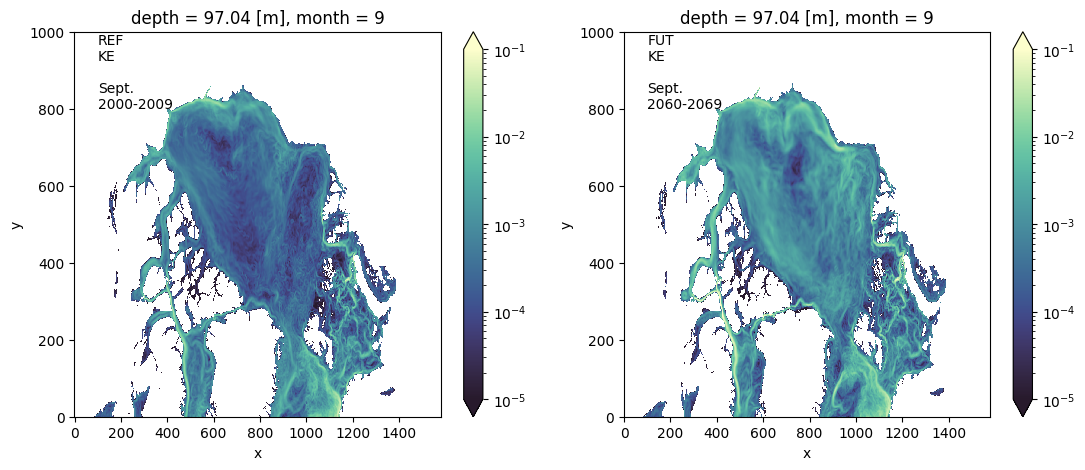

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=23).groupby("time_counter.month").mean("time_counter").sel(month=9).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=23).groupby("time_counter.month").mean("time_counter").sel(month=9).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\nSept.\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\nSept.\n2060-2069")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k23_september.png", dpi=300)

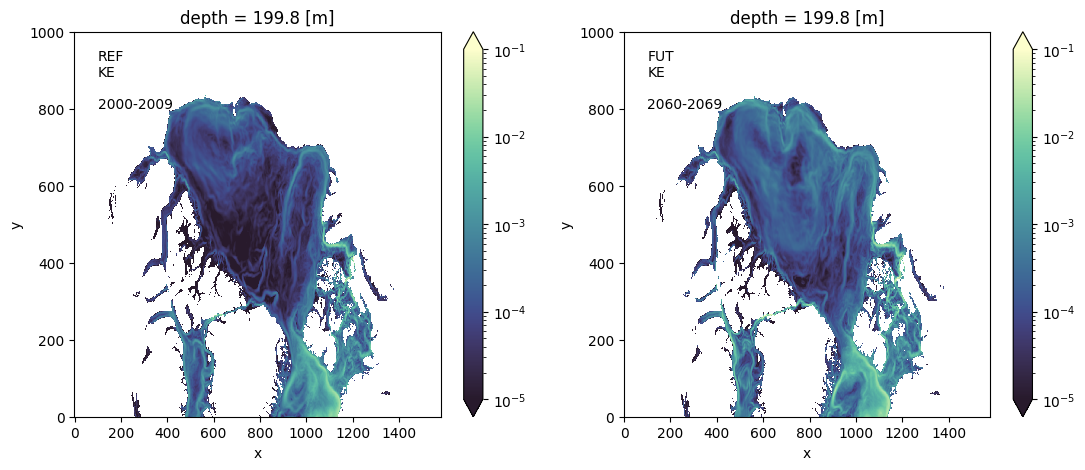

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=30).mean("time_counter").plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=30).mean("time_counter").plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\n2060-2069")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k30.png", dpi=300)

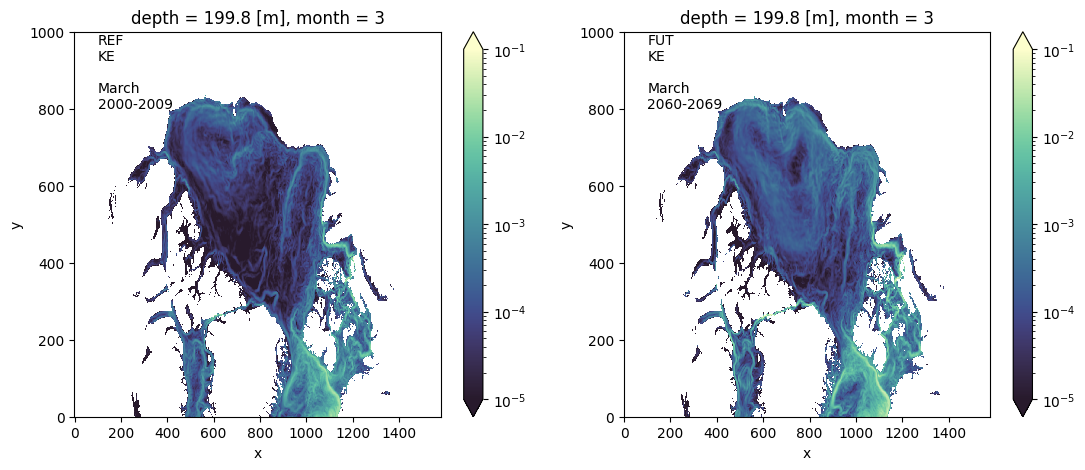

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=30).groupby("time_counter.month").mean("time_counter").sel(month=3).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=30).groupby("time_counter.month").mean("time_counter").sel(month=3).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\nMarch\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\nMarch\n2060-2069")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k30_march.png", dpi=300)

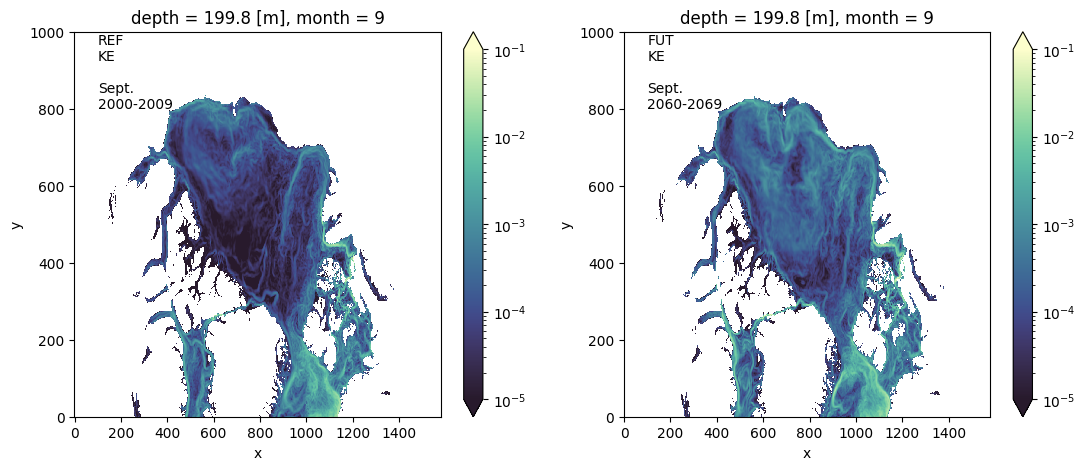

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=30).groupby("time_counter.month").mean("time_counter").sel(month=9).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=30).groupby("time_counter.month").mean("time_counter").sel(month=9).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\nSept.\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\nSept.\n2060-2069")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k30_september.png", dpi=300)

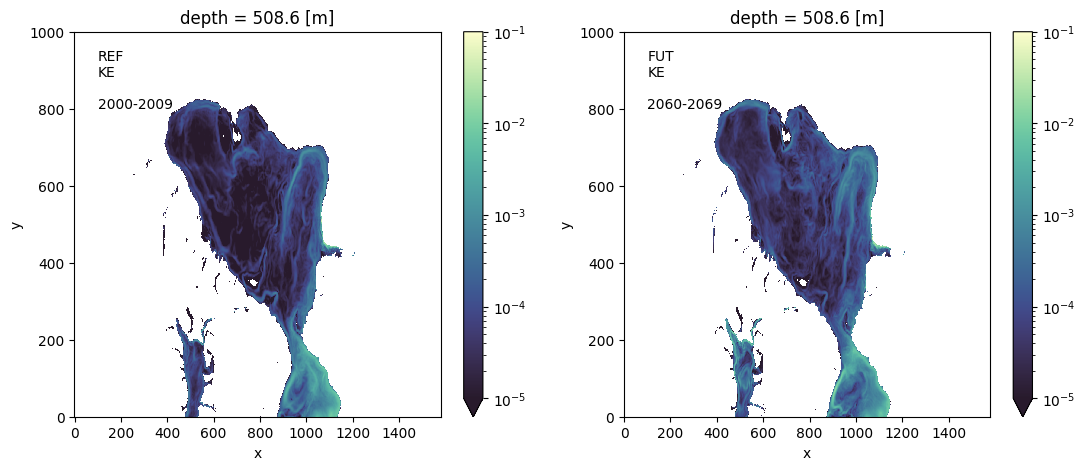

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=39).mean("time_counter").plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=39).mean("time_counter").plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\n2060-2069")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k39.png", dpi=300)

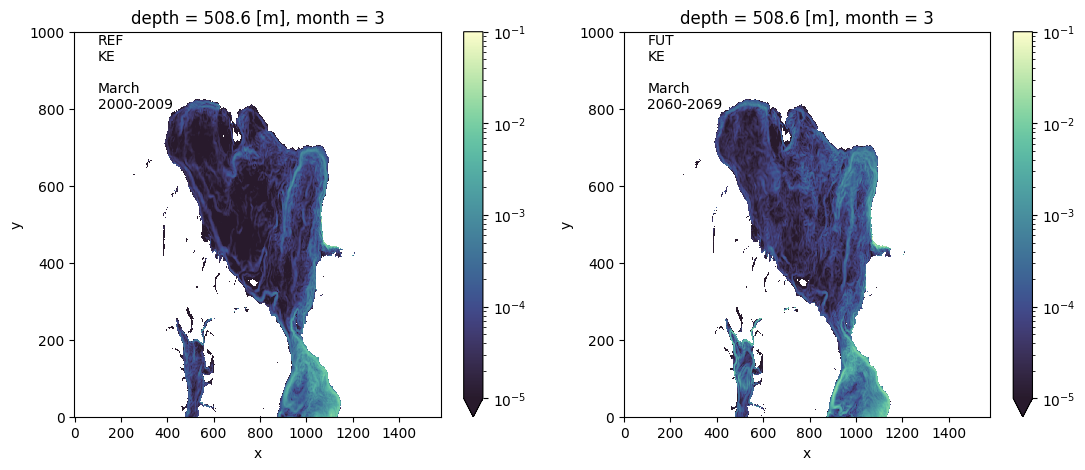

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=39).groupby("time_counter.month").mean("time_counter").sel(month=3).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=39).groupby("time_counter.month").mean("time_counter").sel(month=3).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\nMarch\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\nMarch\n2060-2069")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k39_march.png", dpi=300)

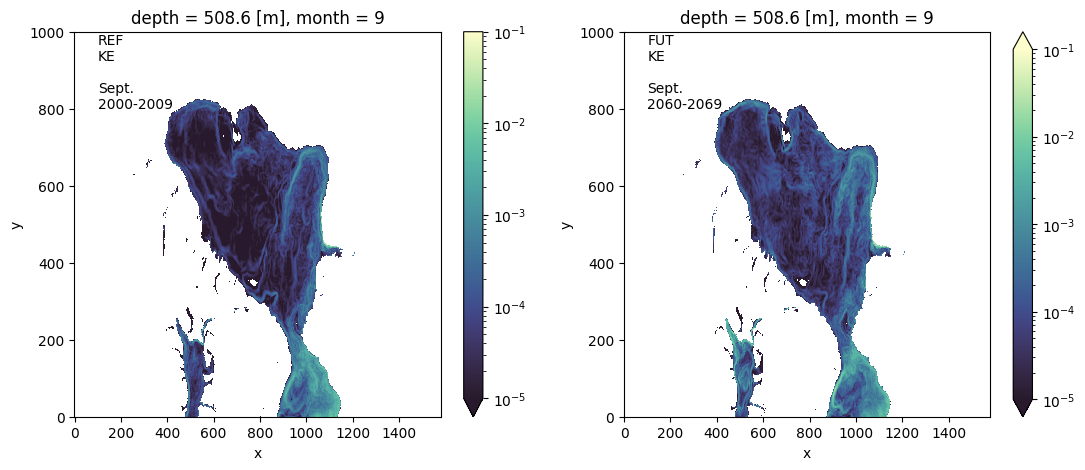

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=39).groupby("time_counter.month").mean("time_counter").sel(month=9).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=39).groupby("time_counter.month").mean("time_counter").sel(month=9).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\nSept.\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\nSept.\n2060-2069")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k39_september.png", dpi=300)

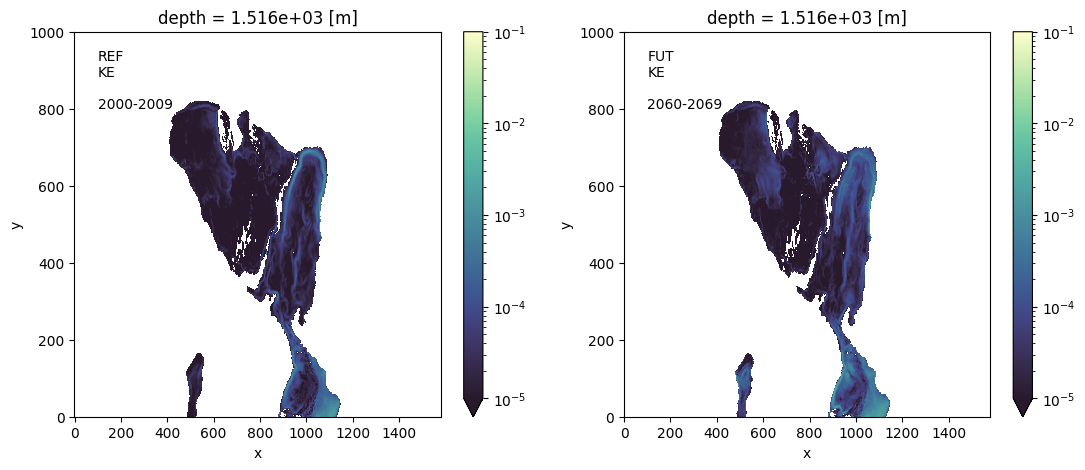

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=50).mean("time_counter").plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=50).mean("time_counter").plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\n2060-2069")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k50.png", dpi=300)

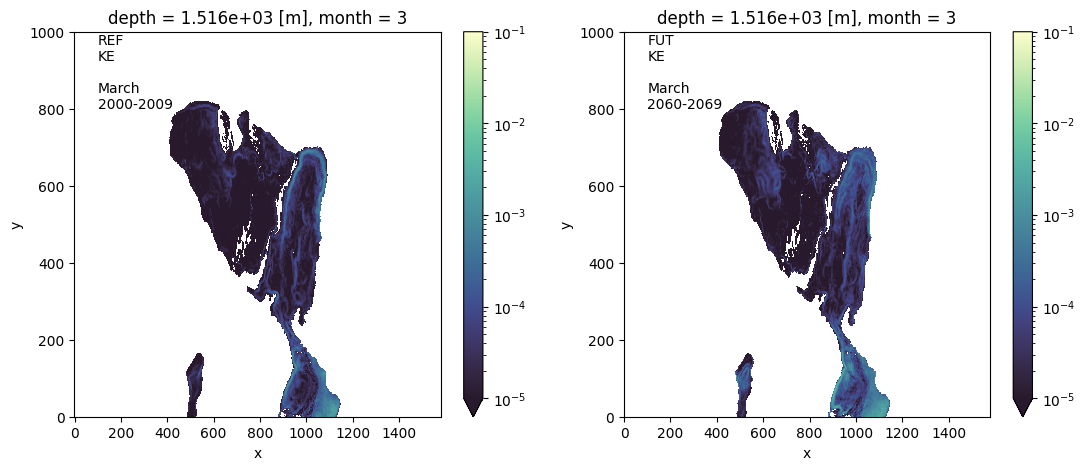

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=50).groupby("time_counter.month").mean("time_counter").sel(month=3).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=50).groupby("time_counter.month").mean("time_counter").sel(month=3).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\nMarch\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\nMarch\n2060-2069")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k50_march.png", dpi=300)

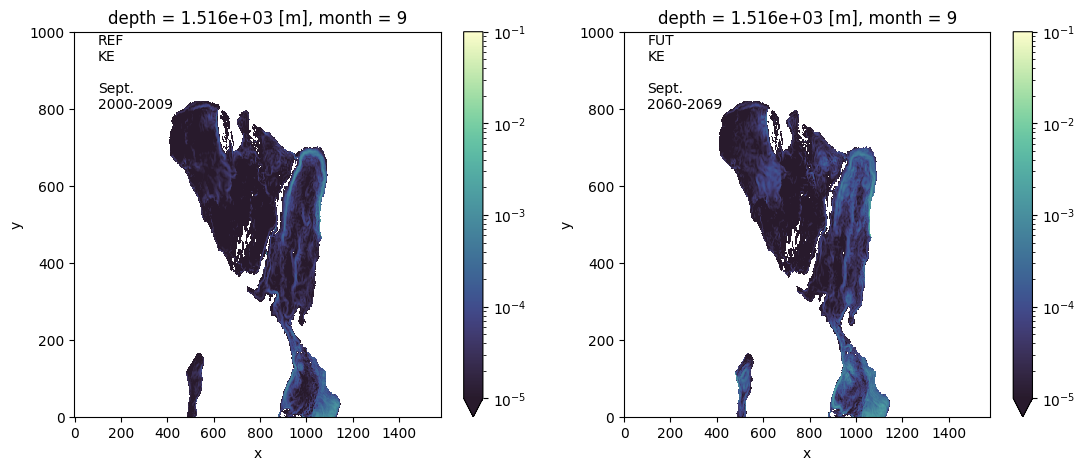

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
KEREF.where(KEREF > 0).isel(depth=50).groupby("time_counter.month").mean("time_counter").sel(month=9).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[0])
KEFUT.where(KEFUT > 0).isel(depth=50).groupby("time_counter.month").mean("time_counter").sel(month=9).plot(vmin=1e-5, vmax=1e-1, 
                                                                                          cmap=cmo.deep_r, norm=colors.LogNorm(), ax=ax[1])
ax[0].text(100, 800, "REF\nKE\n\nSept.\n2000-2009")
ax[1].text(100, 800, "FUT\nKE\n\nSept.\n2060-2069")

plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k50_september.png", dpi=300)